In [48]:
!git clone https://github.com/Wukkkinz-0725/animalImage_classification.git

Cloning into 'animalImage_classification'...
remote: Enumerating objects: 18588, done.
remote: Counting objects: 100% (18588/18588), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 18588 (delta 18553), reused 18578 (delta 18549), pack-reused 0
Receiving objects: 100% (18588/18588), 13.24 MiB | 11.04 MiB/s, done.
Resolving deltas: 100% (18553/18553), done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
Class Distribution Analysis:

Evaluate the distribution of images across the super-classes and sub-classes.

Check for imbalances in the dataset; if some classes are underrepresented, it might affect the model's ability to learn from them.

In [50]:
os.chdir('./animalImage_classification/Released_Data')

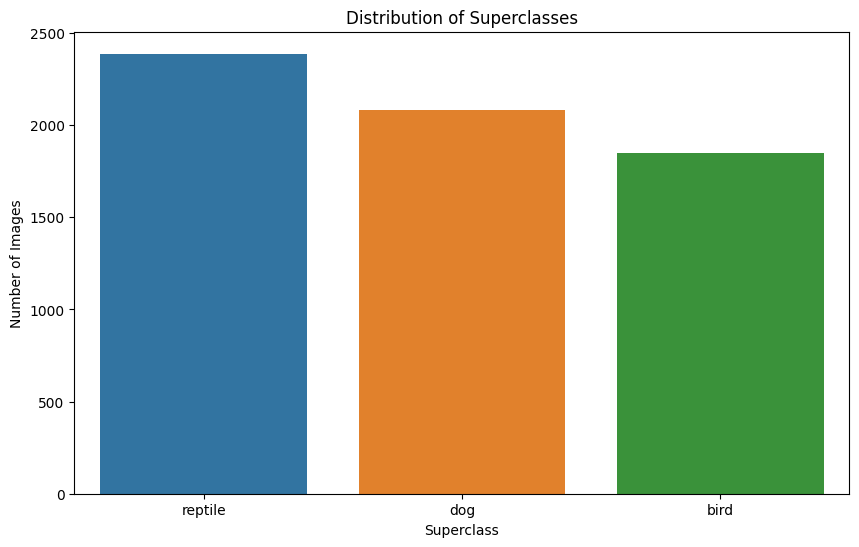

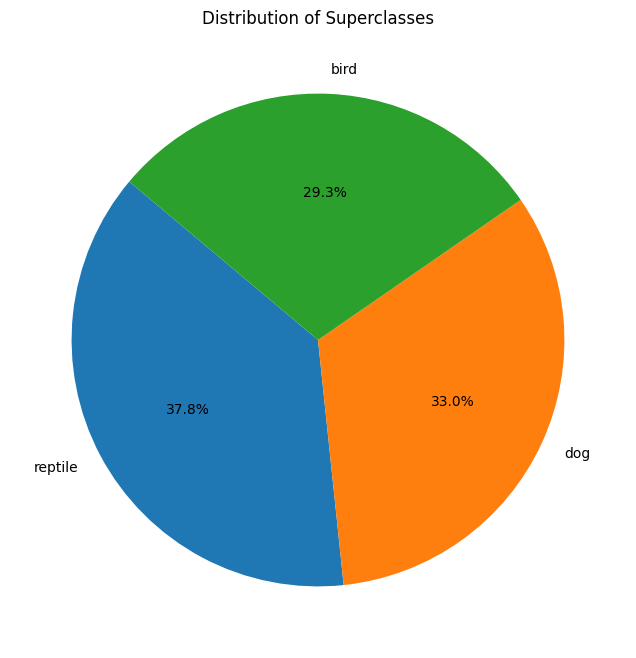

In [59]:
# Load the CSV files
train_data = pd.read_csv('train_data.csv')
subclass_mapping = pd.read_csv('subclass_mapping.csv')
superclass_mapping = pd.read_csv('superclass_mapping.csv')

# Merge the train data with subclass and superclass mappings
train_data = train_data.merge(subclass_mapping, left_on='subclass_index', right_on='index', how='left').rename(columns={'class': 'subclass_name'})
train_data = train_data.merge(superclass_mapping, left_on='superclass_index', right_on='index', how='left').rename(columns={'class': 'superclass_name'})

# Dropping extra columns
train_data.drop(['index_x', 'index_y'], axis=1, inplace=True)

# Class Distribution Analysis
subclass_distribution = train_data['subclass_name'].value_counts()
superclass_distribution = train_data['superclass_name'].value_counts()

# Visualizing the distribution of superclasses
plt.figure(figsize=(10, 6))
sns.barplot(x=superclass_distribution.index, y=superclass_distribution.values)
plt.title('Distribution of Superclasses')
plt.xlabel('Superclass')
plt.ylabel('Number of Images')
plt.show()

# # Visualizing the distribution of subclasses
# plt.figure(figsize=(10, 6))
# sns.barplot(x=subclass_distribution.index, y=subclass_distribution.values)
# plt.title('Distribution of Subclasses')
# plt.xticks(rotation=90)  # Rotate x-labels for better readability
# plt.xlabel('Subclass')
# plt.ylabel('Number of Images')
# plt.show()

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(superclass_distribution, labels=superclass_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Superclasses')
plt.show()


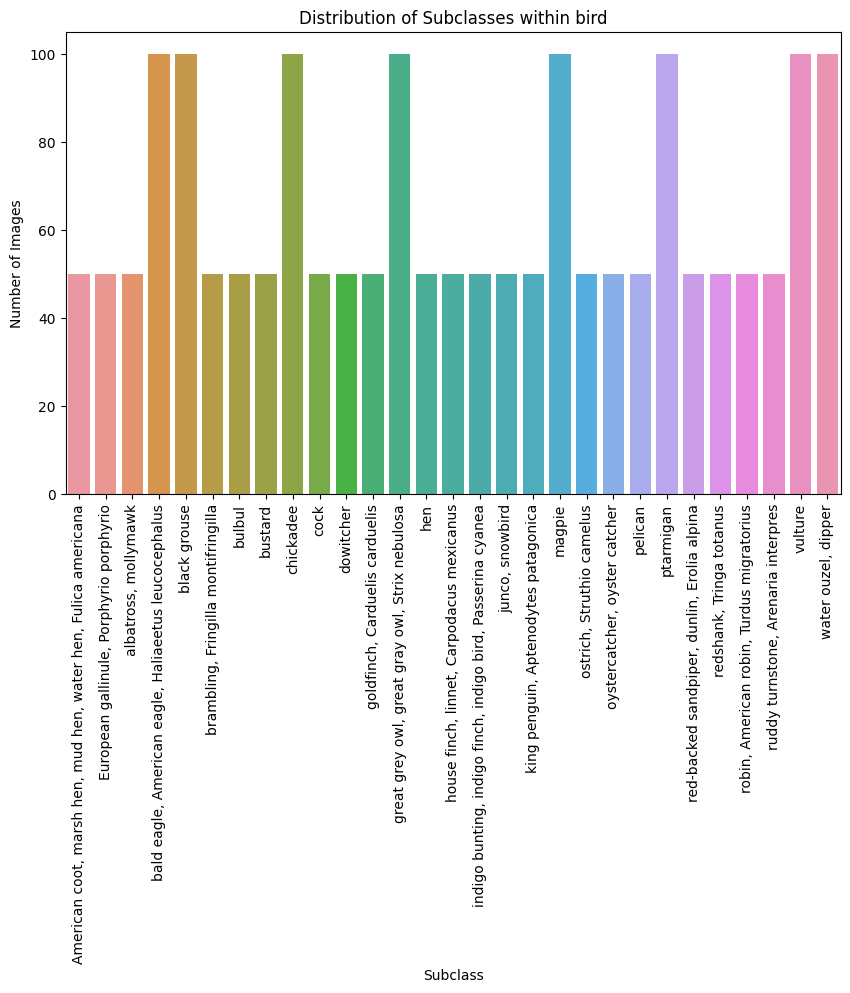

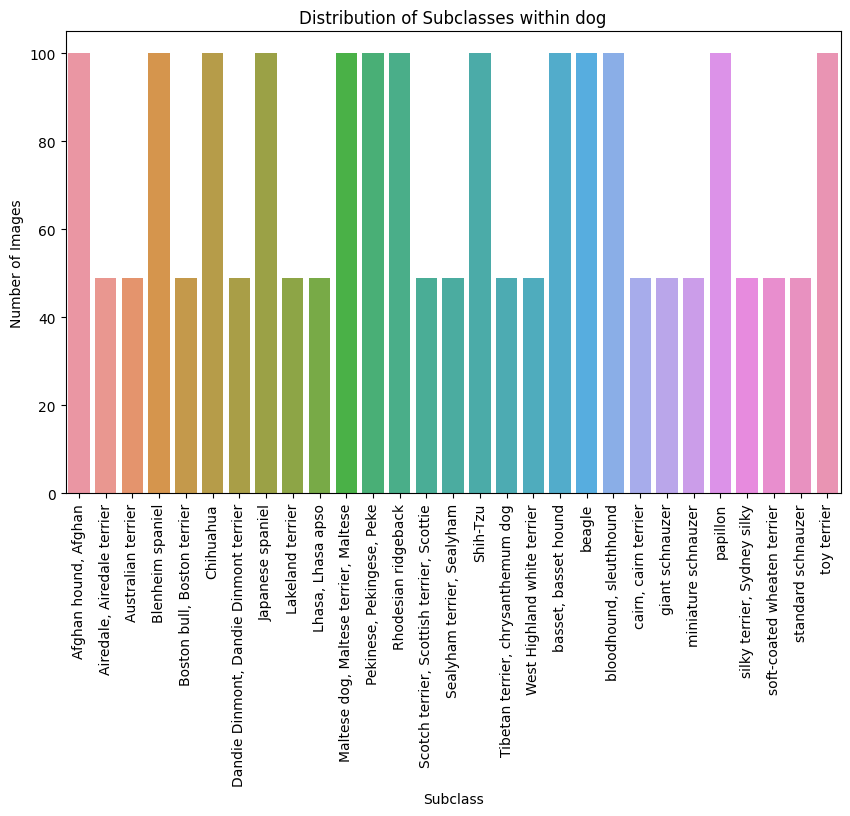

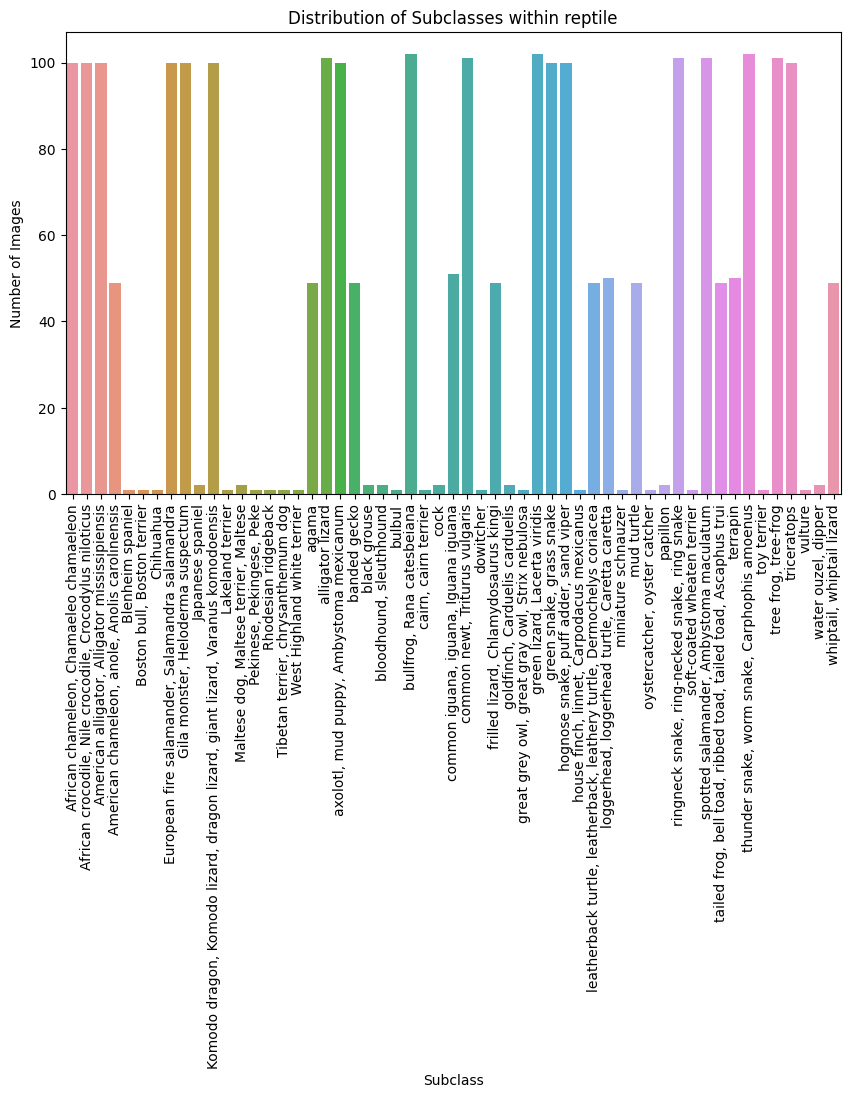

In [56]:
# Load the CSV files
train_data = pd.read_csv('train_data.csv')
subclass_mapping = pd.read_csv('subclass_mapping.csv')
superclass_mapping = pd.read_csv('superclass_mapping.csv')

# Merge the train data with subclass and superclass mappings
train_data = train_data.merge(subclass_mapping, left_on='subclass_index', right_on='index', how='left').rename(columns={'class': 'subclass_name'})
train_data = train_data.merge(superclass_mapping, left_on='superclass_index', right_on='index', how='left').rename(columns={'class': 'superclass_name'})

# Dropping extra columns
train_data.drop(['index_x', 'index_y'], axis=1, inplace=True)

# Group by superclass and then subclass
grouped_data = train_data.groupby(['superclass_name', 'subclass_name']).size().reset_index(name='counts')

# Plotting the distribution of subclasses within each superclass
for superclass in grouped_data['superclass_name'].unique():
    plt.figure(figsize=(10, 6))
    subclass_data = grouped_data[grouped_data['superclass_name'] == superclass]
    sns.barplot(x='subclass_name', y='counts', data=subclass_data)
    plt.title(f'Distribution of Subclasses within {superclass}')
    plt.xticks(rotation=90)  # Rotate x-labels for better readability
    plt.xlabel('Subclass')
    plt.ylabel('Number of Images')
    plt.show()
